In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mglearn
import sklearn
from sklearn.model_selection import train_test_split

/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


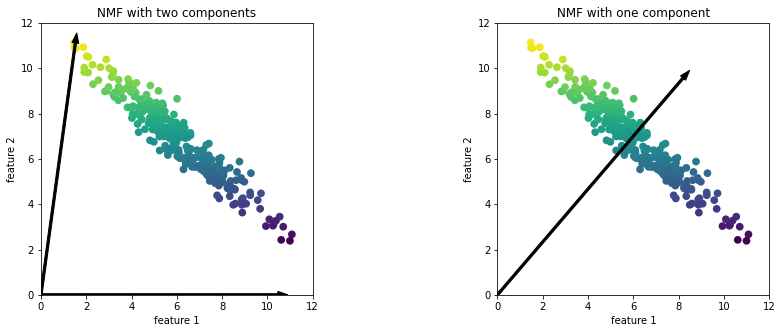

In [3]:
mglearn.plots.plot_nmf_illustration()

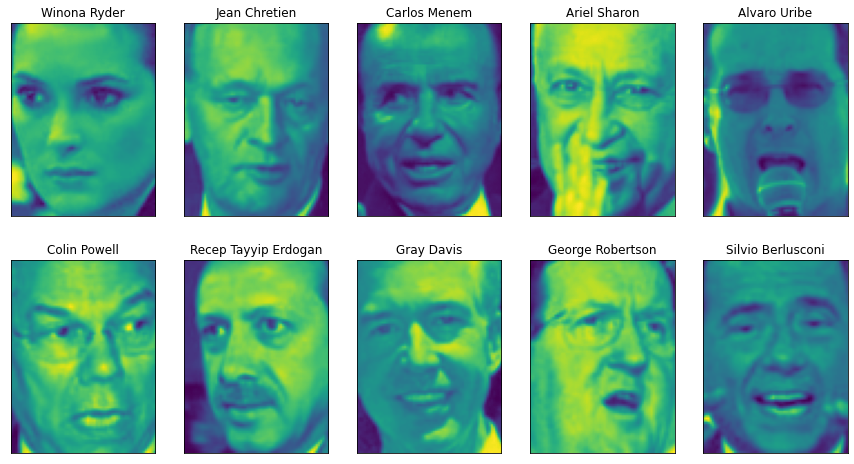

In [4]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

image_shape = people.images[0].shape

fix, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# 将灰度值缩放到0到1之间，而不是在0到255之间
# 以得到更好的数据稳定性
X_people = X_people / 255

from sklearn.neighbors import KNeighborsClassifier
# 将数据分为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, stratify=y_people, random_state=0)

________________________________________________________________________________
[Memory] Calling mglearn.plot_nmf.nmf_faces...
nmf_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))


/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maxi

______________________________________________________nmf_faces - 439.8s, 7.3min


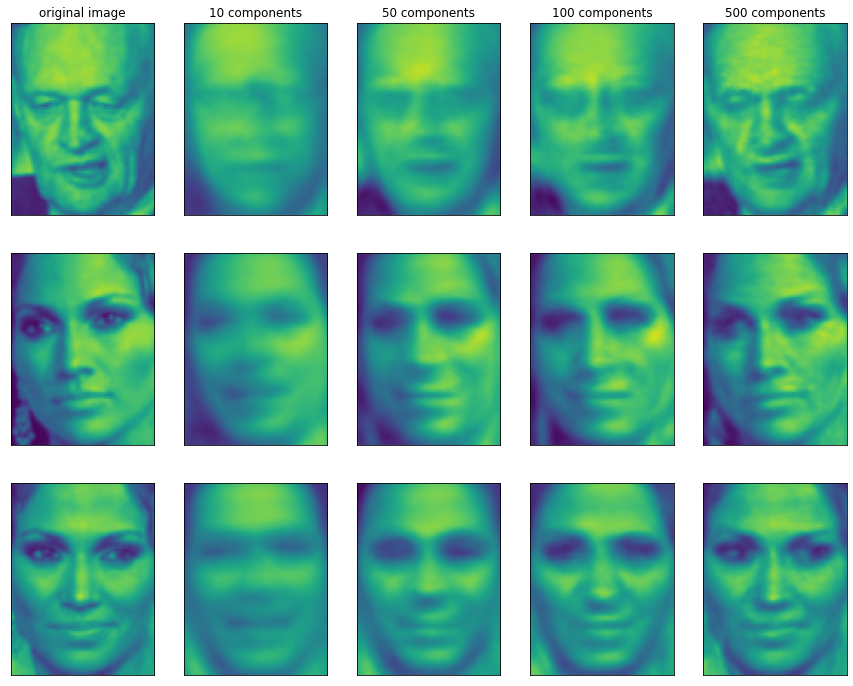

In [18]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


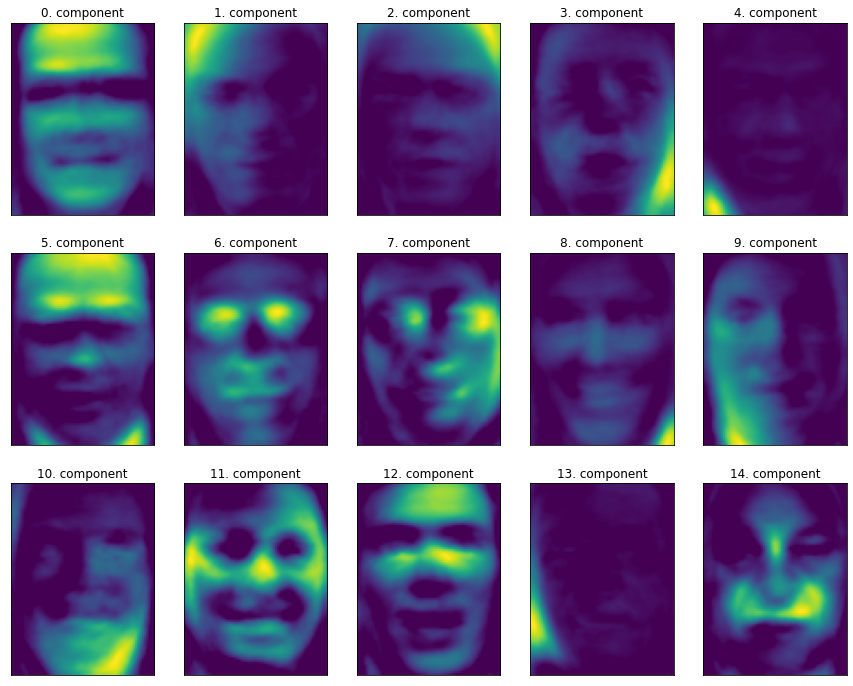

In [7]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12),
                         subplot_kw={'xticks':(), 'yticks':()})
                         
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

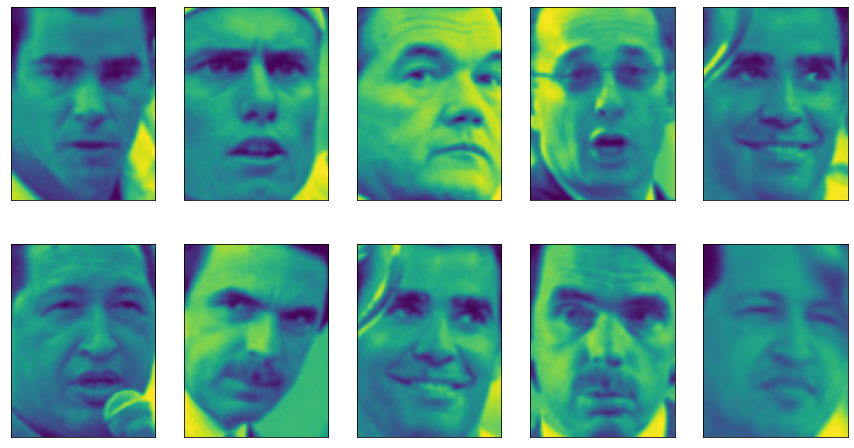

In [8]:
compn = 3
# 按第3个分量排序，绘制前10张图像
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks':(), 'yticks':()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

Text(0, 0.5, 'Signal')

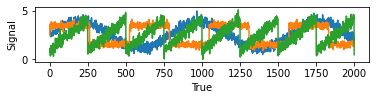

In [9]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6,1))
plt.plot(S, '-')
plt.xlabel("True")
plt.ylabel("Signal")

In [10]:
# 将数据混合成100维的状态
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements:{}".format(X.shape))

Shape of measurements:(2000, 100)


In [11]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Shape of measurements:{}".format(S_.shape))

Shape of measurements:(2000, 3)


/Users/diyixiao/opt/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
H = pca.fit_transform(X)

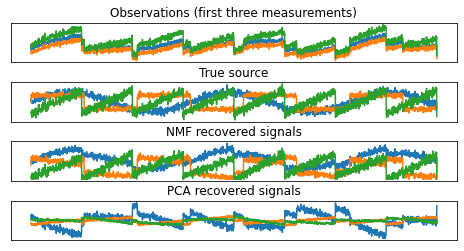

In [13]:
models = [X, S, S_, H]
names = ['Observations (first three measurements)',
         'True source',
         'NMF recovered signals',
         'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4),
                         gridspec_kw={'hspace': .5},
                         subplot_kw={'xticks':(), 'yticks':()})

for model, name, ax in zip(models, names, axes):
    ax.set_title(name)
    ax.plot(model[:, :3], '-')

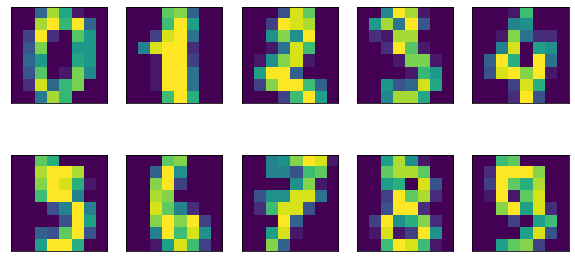

In [14]:
from sklearn.datasets import load_digits
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5),
                         subplot_kw={'xticks':(), 'yticks':()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

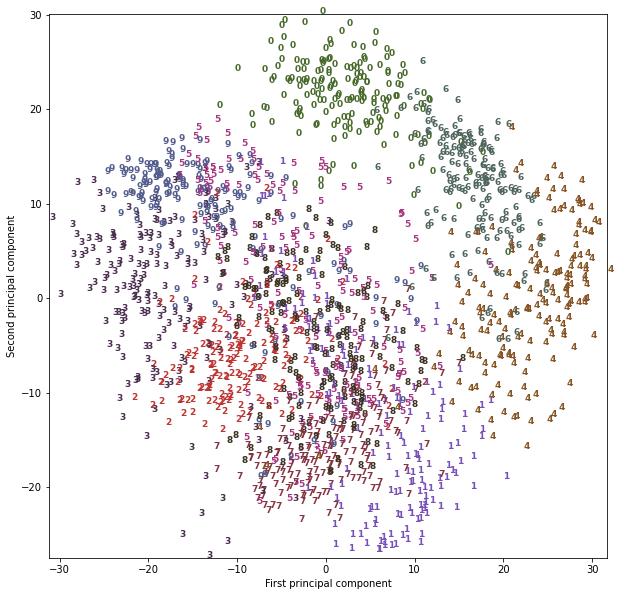

In [15]:
# 构建一个PCA模型
pca = PCA(n_components=2)
pca.fit(digits.data)
# 将digits数据变换到前两个主成分到方向上
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [16]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# 使用fit_transform而不是fit，因为TSNE没有transform方法
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

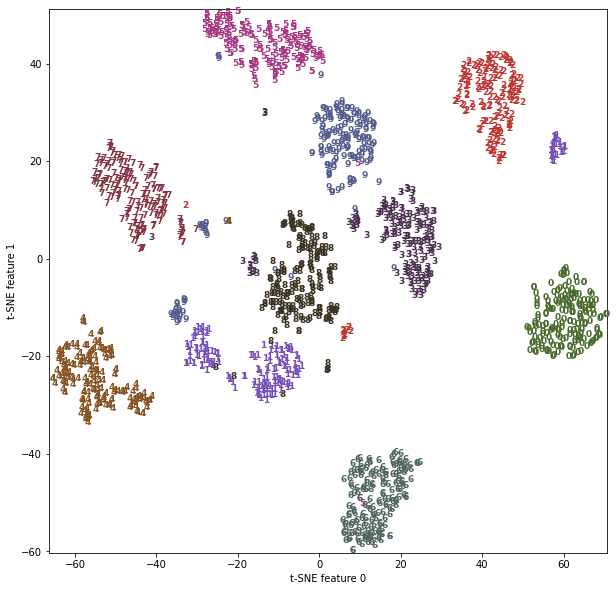

In [17]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # 将数据实际绘制成文本，而不是散点
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")